## Asher Mancinelli
### Tensorflow Examples

In [58]:
import tensorflow as tf
import numpy as np
import random
import math
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

## Data Creation

Here we create our dataset which spreads data over four sections. The neural network will then learn the categories through the training data, and we will feed new data into it to see how well it learned the relationships. 
The data is a random set of data points within a quadrant of the cartesian plane, each added with some random noise to introduce overlap of the categories. 

In [142]:
samples = 100
x1 = [ random.random()*10 + random.random()*4 - 2 for i in range(samples) ]
y1 = [ random.random()*10 + random.random()*4 - 2 for i in range(samples) ]

x2 = [ random.random()*-10 + random.random()*4 - 2 for i in range(samples) ]
y2 = [ random.random()*10 + random.random()*4 - 2 for i in range(samples) ]

x3 = [ random.random()*10 + random.random()*4 - 2 for i in range(samples) ]
y3 = [ random.random()*-10 + random.random()*4 - 2 for i in range(samples) ]

x4 = [ random.random()*-10 + random.random()*4 - 2 for i in range(samples) ]
y4 = [ random.random()*-10 + random.random()*4 - 2 for i in range(samples) ]

data = []
labels = []
category = 0
for i, j in [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]:
    data += [ (k, l) for k, l in zip(i, j) ]
    labels += [ category for index in range(len(i)) ]
    category += 1
    
one_hot = []
for i in labels:
    temp = np.zeros(4)
    temp[i] = 1
    one_hot.append(temp)
    
labels = one_hot

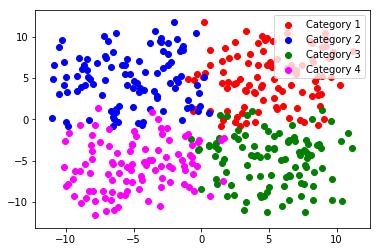

In [143]:
plt.scatter(x1, y1, color='red', label='Category 1')
plt.scatter(x2, y1, color='blue', label='Category 2')
plt.scatter(x3, y3, color='green', label='Category 3')
plt.scatter(x4, y4, color='magenta', label='Category 4')

plt.legend(loc='best')
plt.show()

Here we can see how the categories have quite a bit of overlap. This is where neural networks thrive; where there is a lot of data to look at, but the solution is quite fuzzy. This network will take in an X and a Y coordinate, and will return its prediction of the category that data point falls into. Next, we create the tensorflow graph we'll be using as our neural network. 

## Graph Creation

The shape of x is 2 becuase the input data is shaped (X, Y), therefore x is one list with two elements, and has shape (2, ). y has shape 4 because there are four possible categories, and y is formatted as a `one-hot array` which means that one element of the array is 1 and all other elements are 0. 

In [137]:
batch_size = 10

x = tf.placeholder(tf.float32, shape=(batch_size, 2))
y = tf.placeholder(tf.float32, shape=(batch_size, 4))

In [149]:
nn = tf.layers.dense(x, 32, activation=tf.nn.relu)
nn = tf.layers.dense(nn, 64, activation=tf.nn.relu)
nn = tf.layers.dense(nn, 64, activation=tf.nn.relu)
nn = tf.layers.dense(nn, 32, activation=tf.nn.relu)
nn = tf.layers.dense(nn, 4)
pred = tf.nn.softmax(nn)

loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
    logits=nn, labels=tf.argmax(tf.cast(y, dtype=tf.int32), axis=1)))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-4)
train_op = optimizer.minimize(loss_op)

init_op = tf.global_variables_initializer()

In [172]:
num_epochs = 100

with tf.Session() as sess:
    sess.run(init_op)
    for _ in range(num_epochs):
        cost = 0
        for i in range((len(data) // batch_size) - 1):
            x_batch = data[i*batch_size : (i+1)*batch_size]
            y_batch = labels[i*batch_size : (i+1)*batch_size]
            
            _, c = sess.run([train_op, loss_op], {x: x_batch, y: y_batch})
            cost += c
            
        print(f'Cost for this epoch: {cost}')

Cost for this epoch: 58.29567068815231
Cost for this epoch: 57.28080302476883
Cost for this epoch: 56.302181363105774
Cost for this epoch: 55.35661631822586
Cost for this epoch: 54.44581651687622
Cost for this epoch: 53.56326347589493
Cost for this epoch: 52.72414189577103
Cost for this epoch: 51.91747343540192
Cost for this epoch: 51.13947421312332
Cost for this epoch: 50.38907039165497
Cost for this epoch: 49.665003418922424
Cost for this epoch: 48.96806538105011
Cost for this epoch: 48.292544424533844
Cost for this epoch: 47.64794969558716
Cost for this epoch: 47.03727167844772
Cost for this epoch: 46.46229076385498
Cost for this epoch: 45.913152277469635
Cost for this epoch: 45.38291108608246
Cost for this epoch: 44.866884648799896
Cost for this epoch: 44.36399132013321
Cost for this epoch: 43.877576768398285
Cost for this epoch: 43.40657198429108
Cost for this epoch: 42.949010372161865
Cost for this epoch: 42.50214284658432
Cost for this epoch: 42.06589186191559
Cost for this epoc

In [179]:
test_size = 10
x_test = [ random.random()*20 - 10 for i in range(test_size)]
y_test = [ random.random()*20 - 10 for i in range(test_size)]
pred_data = [(i, j) for i, j in zip(x_test, y_test)]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    predictions = sess.run(pred, {x: pred_data})
    predictions = sess.run(tf.argmax(predictions, axis=1))
    print(predictions)

[0 0 3 0 3 0 0 0 0 0]


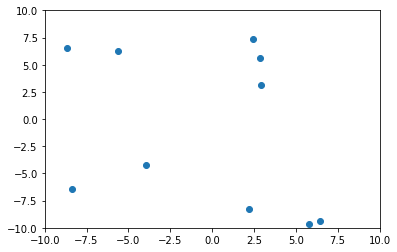

In [180]:
plt.scatter(x_test, y_test)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.show()